In [1]:
import pandas as pd 
import calour as ca 
import matplotlib.pyplot as plt
from qiime2 import Artifact

In [2]:
import pandas as pd 
import calour as ca 

In [3]:
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_columns',100)

In [4]:
ca.set_log_level(11)

In [5]:
#
exp=ca.read_amplicon('../deblur-results/core-metrics-results-no-mito-no-chlo-2099/rarefied_table.qza',
                     '../../illumina-meta-analysis/all-data-meta-analysis/metadata-raw.tsv',data_file_type='qiime2',normalize=100,min_reads=None)

2022-04-18 10:57:43 INFO loaded 32 samples, 3972 features
2022-04-18 10:57:43 WARNING These have metadata but do not have data - dropped (2706): {'SRR3991153', 'SRR7534014', 'SRR3195184', 'ERR2597218', 'ERR2597222', 'SRR3194090', 'SRR3194125', 'SRR7989480', 'SRR3991120', 'SRR7989352', 'SRR6478041', 'SRR6478144', 'ERR2092810', 'SRR5269930', 'ERR2597118', 'ERR2597217', 'SRR5269851', 'SRR7534095', 'SRR5270077', 'SRR6477948', 'SRR5269874', 'SRR3991226', 'SRR6477753', 'SRR3991264', 'SRR7989410', 'SRR7534223', 'ERR2597082', 'SRR6478197', 'SRR6478219', 'SRR3991133', 'SRR7534044', 'SRR7989337', 'SRR6477733', 'SRR7533959', 'SRR7533860', 'SRR6478100', 'SRR7534027', 'SRR6478327', 'SRR7534021', 'SRR7534172', 'SRR5270082', 'SRR3991259', 'SRR6477895', 'SRR7534147', 'SRR5269919', 'SRR8031260', 'ERR1995022', 'ERR2597056', 'SRR6478162', 'SRR3991194', 'SRR7989325', 'ERR2597078', 'SRR6477935', 'ERR1995108', 'SRR7534011', 'SRR6478102', 'SRR7989363', 'SRR5270100', 'SRR6478208', 'SRR6477853', 'SRR12147659',

In [6]:
taxo=Artifact.load('../deblur-results/taxonomy.qza').view(pd.DataFrame)
taxo.head(2)

,Taxon,Confidence
Feature ID,,
TAGGGAATCTTCGGCAATGGGGGCAACCCTGACCGAGCAACGCCGCGTGAGTGAAGAAGGTTTTCGGATCGTAAAGCTCTGTTGTAAGTCAAGAACGAGTGTGAGAGTGGAAAGTTCACACTGTGACGGTAGCTTACCAGAAAGGGACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGC,k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Streptococcaceae; g__Streptococcus; s__,0.9653116676029425
TGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCAATGCCGCGTGTGTGAAGAAGGCCTTCGGGTTGTAAAGCACTTTTGTCCGGGAAGAAATCGCACCTGATAATACCGGGTGTGGATGACGGTACCGGAAGAATAAGGACCGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGGTCCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCG,k__Bacteria; p__Proteobacteria; c__Betaproteobacteria; o__Burkholderiales; f__Oxalobacteraceae; g__Ralstonia; s__,0.9850723304872939


In [7]:
exp.feature_metadata=exp.feature_metadata.join(taxo,on='_feature_id')
exp.feature_metadata.head(2)

,_feature_id,Taxon,Confidence
TGAGGAATATTGGTCAATGGGCGGAAGCCTGAACCAGCCATGCCGCGTGAAGGAATAAGGCCCTACGGGTCGTAAACTTCTTTTGTGGCGGAGCAATAAGGATCACGTGTGGTCCGATGAGATTACGTCACGAATAAGCATCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGATGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCTGTCCG,TGAGGAATATTGGTCAATGGGCGGAAGCCTGAACCAGCCATGCCGCGTGAAGGAATAAGGCCCTACGGGTCGTAAACTTCTTTTGTGGCGGAGCAATAAGGATCACGTGTGGTCCGATGAGATTACGTCACGAATAAGCATCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGATGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCTGTCCG,k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__; g__; s__,0.8773449656980965
TGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCGACGCCGCGTGGGGGATGACGGCCTTCGGGTTGTAAACTCCTTTCGTTAGGGACGAAGCCGCACCTTTTTTGGGTGTGGTGACGGTACCTTTGTTAAGAAGCACCGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGGTGCGAGCGTTGTCCGGAATTACTGGGCGTAAAGAGCTCGTAGGTGGTTT,TGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCGACGCCGCGTGGGGGATGACGGCCTTCGGGTTGTAAACTCCTTTCGTTAGGGACGAAGCCGCACCTTTTTTGGGTGTGGTGACGGTACCTTTGTTAAGAAGCACCGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGGTGCGAGCGTTGTCCGGAATTACTGGGCGTAAAGAGCTCGTAGGTGGTTT,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Corynebacteriaceae; g__Corynebacterium; s__,0.9917617485962644


In [8]:
exp.split_taxonomy(field='Taxon')

AmpliconExperiment with 32 samples, 3972 features

In [9]:
exp.sample_metadata.head()

,Age,BMI,BioProject,CagA,Center_Name,Collection_Date,Condition,Country,Gender,HP_status,HP_test_method,Histopathological_score,Histopathology,Histopathology(lauren_classification),Hour_collected,LibraryLayout,Mesalamine_administration,Mesalamine_concentration,Note,Other_disease,PGI_PGII_ratio,Ph,Race,Region,SRA_Study,Sample_location,Sample_type,Sequencing_method,Sequencing_region,Subject_id,Tissue,Treatment,Week,Year,gastrin,host_height,host_weight,paried-sample,smoker,Name,Diagnosis,sampling_method,primer,HP_status_,_sample_id,_calour_original_abundance
sample-id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SRR8031255,25.0,19.56,PRJNA495436,NaN,THE FIRST AFFILIATED HOSPITAL OF NANCHANG UNIVERSITY,NaN,superficial gastritis,China,female,positive,13C-UBT,NaN,NaN,NaN,NaN,PAIRED,NaN,NaN,Hp eradication by bismuth quadruple therapy,NaN,NaN,NaN,NaN,Nanchang,SRP165213,NaN,gastric mucosa,Illumina MiSeq,v3-v4,6,NaN,bismuth quadruple therapy,26.0,NaN,NaN,NaN,NaN,B6,NaN,SRR8031255,gastritis,gastric mucosa biopsy,338F_806R,P,SRR8031255,2099.0
SRR8031229,22.0,20.55,PRJNA495436,NaN,THE FIRST AFFILIATED HOSPITAL OF NANCHANG UNIVERSITY,NaN,superficial gastritis,China,female,positive,13C-UBT,NaN,NaN,NaN,NaN,PAIRED,NaN,NaN,Normal,NaN,NaN,NaN,NaN,Nanchang,SRP165213,NaN,gastric mucosa,Illumina MiSeq,v3-v4,8,NaN,bismuth quadruple therapy,0.0,NaN,NaN,NaN,NaN,S8,NaN,SRR8031229,gastritis,gastric mucosa biopsy,338F_806R,P,SRR8031229,2099.0
SRR8031265,24.0,22.99,PRJNA495436,NaN,THE FIRST AFFILIATED HOSPITAL OF NANCHANG UNIVERSITY,NaN,superficial gastritis,China,male,positive,13C-UBT,NaN,NaN,NaN,NaN,PAIRED,NaN,NaN,Hp eradication by bismuth quadruple therapy,NaN,NaN,NaN,NaN,Nanchang,SRP165213,NaN,gastric mucosa,Illumina MiSeq,v3-v4,10,NaN,bismuth quadruple therapy,26.0,NaN,NaN,NaN,NaN,B10,NaN,SRR8031265,gastritis,gastric mucosa biopsy,338F_806R,P,SRR8031265,2099.0
SRR8031258,22.0,20.55,PRJNA495436,NaN,THE FIRST AFFILIATED HOSPITAL OF NANCHANG UNIVERSITY,NaN,superficial gastritis,China,female,positive,13C-UBT,NaN,NaN,NaN,NaN,PAIRED,NaN,NaN,Hp eradication by bismuth quadruple therapy,NaN,NaN,NaN,NaN,Nanchang,SRP165213,NaN,gastric mucosa,Illumina MiSeq,v3-v4,8,NaN,bismuth quadruple therapy,26.0,NaN,NaN,NaN,NaN,S8,NaN,SRR8031258,gastritis,gastric mucosa biopsy,338F_806R,P,SRR8031258,2099.0
SRR8031259,23.0,24.84,PRJNA495436,NaN,THE FIRST AFFILIATED HOSPITAL OF NANCHANG UNIVERSITY,NaN,superficial gastritis,China,male,positive,13C-UBT,NaN,NaN,NaN,NaN,PAIRED,NaN,NaN,Normal,NaN,NaN,NaN,NaN,Nanchang,SRP165213,NaN,gastric mucosa,Illumina MiSeq,v3-v4,12,NaN,bismuth quadruple therapy,0.0,NaN,NaN,NaN,NaN,S12,NaN,SRR8031259,gastritis,gastric mucosa biopsy,338F_806R,P,SRR8031259,2099.0


In [11]:
#exp_s=exp_s.filter_samples('Sample_location',['Antrum'])
exp_s=exp.filter_samples('Sample_location',['feces'],negate=True)
exp_s

AmpliconExperiment with 32 samples, 3972 features

In [12]:
pylori=exp_s.filter_by_metadata('species',[' s__pylori'],axis='f')
pylori

AmpliconExperiment with 32 samples, 3 features

In [13]:
#pylori.save_fasta('s__pylori-seqs.fasta')

In [14]:
# discard low abundance feadture and not prevalence feature
exp_f=exp_s.filter_sum_abundance(cutoff=0.05)
exp_f=exp_f.filter_prevalence(cutoff=0.05,fraction=0.01)

2022-04-18 10:59:22 INFO After filtering, 1785 remain.
2022-04-18 10:59:22 INFO After filtering, 1328 remain.


In [16]:
# select hp ASVs
exp_hp=exp_f.filter_by_metadata('species',[' s__pylori'],axis='f')
exp_hp 

AmpliconExperiment with 32 samples, 2 features

In [17]:
exp_heli=exp_f.filter_by_metadata('genus',[' g__Helicobacter'],axis='f')
exp_heli

AmpliconExperiment with 32 samples, 3 features

In [18]:
hp=exp_hp.to_pandas(sparse=False)
hp.head()

,TAGGGAATATTGCTCAATGGGGGAAACCCTGAAGCAGCAACGCCGCGTGGAGGATGAAGGTTTTAGGATTGTAAACTCCTTTTGTTAGAGAAGATAATGACGGTATCTAACGAATAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCC,TAGGGAATATTGCTCAATGGGGGAAACCCTGAAGCAGCAACGCCGCGTGGAGGATGAAGGTTTTAGGATTGTAAACTCCTTTTGTTAGAGAAGATAATGACGGTATCTAACGAATAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGTGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCC
sample-id,,
SRR8031255,0.000000,0.0
SRR8031229,83.992377,0.0
SRR8031265,0.000000,0.0
SRR8031258,0.000000,0.0
SRR8031259,77.656027,0.0


In [19]:
%matplotlib inline

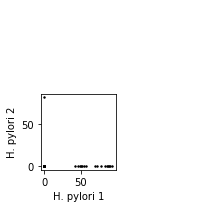

In [20]:
dispar=hp
t='H. pylori'
n = dispar.shape[1]
fig, axs = plt.subplots(n, n, figsize=(3, 3), sharex=True, sharey=True)
for column, a in enumerate(dispar.columns):
    for index, b in enumerate(dispar.columns):
        if index > column:
            axs[index, column].scatter(x=dispar.loc[:, a], 
                                       y=dispar.loc[:, b],
                                       s=2,
                                       marker='o',
                                       color='black') # s: markersize
            axs[index, column].set_ylabel('%s %s' % (t, str(index + 1)))
            axs[index, column].set_xlabel('%s %s' % (t, str(column + 1)))
        else:
            axs[index, column].axis('off')
for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
#fig.savefig('hp-vs-hp-scatter-plot.pdf')

In [21]:
non_pylori_heli_ID=exp_f.feature_metadata.query('(genus == " g__Helicobacter") & ( species!= " s__pylori")').index.to_list()
non_pylori_heli_ID   

['TAGGGAATATTGCTCAATGGGGGAAACCCTGAAGCAGCAACGCCGCGTGGAGGATGAAGGTTTTCGGATTGTAAACTCCTTTTGTTAGAGAAGATAATGACGGTATCTAACGAATAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGCAAGTCAGATGTGAAATCC']

In [22]:
exp_heli=exp_f.filter_ids(non_pylori_heli_ID,axis='f')
exp_heli

AmpliconExperiment with 32 samples, 1 features

In [23]:
heli=exp_heli.to_pandas(sparse=False)


In [24]:
exp_heli.feature_metadata

,_feature_id,Taxon,Confidence,kingdom,phylum,class,order,family,genus,species
TAGGGAATATTGCTCAATGGGGGAAACCCTGAAGCAGCAACGCCGCGTGGAGGATGAAGGTTTTCGGATTGTAAACTCCTTTTGTTAGAGAAGATAATGACGGTATCTAACGAATAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGCAAGTCAGATGTGAAATCC,TAGGGAATATTGCTCAATGGGGGAAACCCTGAAGCAGCAACGCCGCGTGGAGGATGAAGGTTTTCGGATTGTAAACTCCTTTTGTTAGAGAAGATAATGACGGTATCTAACGAATAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGCAAGTCAGATGTGAAATCC,k__Bacteria; p__Proteobacteria; c__Epsilonproteobacteria; o__Campylobacterales; f__Helicobacteraceae; g__Helicobacter,0.7830296362205963,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,None


In [25]:
%matplotlib inline

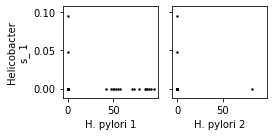

In [27]:
fig, axs = plt.subplots(heli.shape[1], hp.shape[1], figsize=(4,2), sharex=True, sharey=True)
for column, a in enumerate(hp.columns):
    for index, b in enumerate(heli.columns):
        
        axs[column].scatter(x=hp.loc[:, a], 
                                       y=heli.loc[:, b],
                                       s=2,
                                       marker='o',
                                       color='black') # s: markersize
        #axs[index, column].set_ylabel('%s %s' % ('s_unk_non_pylori_helicobactor', str(index + 1))) 
        
        axs[column].set_xlabel('%s %s' % ('H. pylori', str(column + 1)))
        if exp_heli.feature_metadata.loc[b,'species'] ==None :
            
            axs[column].set_ylabel('Helicobacter\n%s %s' % ('s_', str(index + 1)))
        else:
            axs[column].set_ylabel('Helicobacter\n' + exp_heli.feature_metadata.loc[b,'species'])

for ax in axs.flat:
    ax.label_outer()
plt.tight_layout()
#fig.savefig('hp-vs-non-pylori-helicobactor-scatter-plot.pdf')